In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis
y = np.where(y > 0, 0, 1)




In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.

17.5 ms ± 927 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


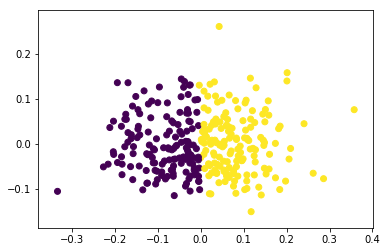

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [11]:
# Normalize the data
X_norm = normalize(X)

# Reduce it to two components
X_pca = PCA(2).fit_transform(X_norm)

# Calculate the predicted values
%timeit y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Not an overly good model, try again with MiniBatch

9.16 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Comparing k-means and mini batch k-means solutions
col_0    0    1
row_0          
0        1  154
1      148    0
Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      56  99
1      83  65


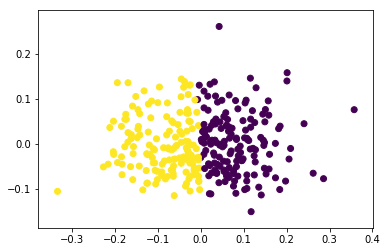

In [12]:
# Each batch will be made up of 200 data points
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)

%timeit predict_mini = minibatchkmeans.fit_predict(X_pca)


# Check the MiniBatch model against our earlier one
print('Comparing k-means and mini batch k-means solutions')
print(pd.crosstab(predict_mini, y_pred))


# Check the MiniBatch Model against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_mini, y))

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
plt.show()


## Drill: More Clusters?
Your task is to take the  kk -means code here and see what happens when you change the value of  kk . What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      48  76
1      58  31
2      33  57


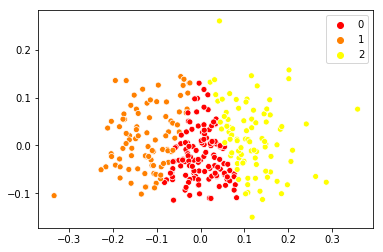

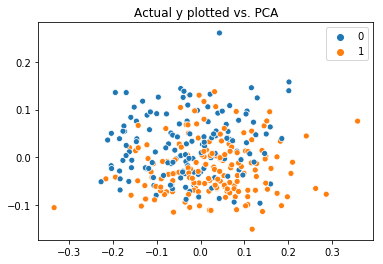

In [52]:

X_pca = PCA(2).fit_transform(X_norm)

minibatchkmeans3 = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)

predict_mini3 = minibatchkmeans3.fit_predict(X_pca)


# Check the MiniBatch Model against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_mini3, y))

# Plot the solution
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=predict_mini3, legend='brief', palette='autumn')
plt.show()

plt.title('Actual y plotted vs. PCA')
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y)
plt.show()

69.21578947368421

In [40]:
29 / (42 + 42)

0.34523809523809523

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      37  21
1      36  69
2      27  49
3      39  25


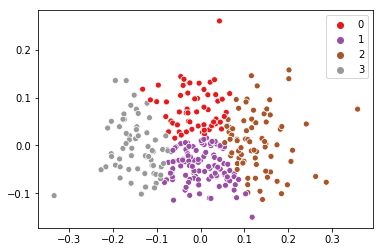

In [53]:

X_pca = PCA(2).fit_transform(X_norm)

minibatchkmeans4 = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)

predict_mini4 = minibatchkmeans4.fit_predict(X_pca)


# Check the MiniBatch Model against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_mini4, y))

# Plot the solution
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=predict_mini4, legend='brief', palette='Set1')
plt.show()


Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      27  43
1      31  21
2      29  30
3      28  64
4      24   6


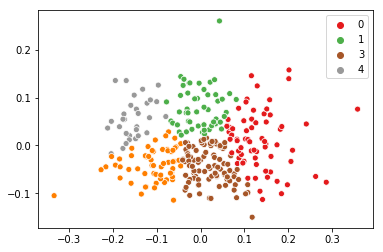

In [56]:
X_pca = PCA(2).fit_transform(X_norm)

minibatchkmeans5 = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=200)

predict_mini5 = minibatchkmeans5.fit_predict(X_pca)


# Check the MiniBatch Model against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_mini5, y))

# Plot the solution
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=predict_mini5, palette='Set1')
plt.show()


Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      34  49
1      26  60
2      35  14
3      36  23
4       8  18


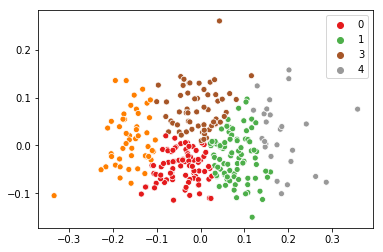

In [55]:
X_pca = PCA(2).fit_transform(X_norm)

minibatchkmeans6 = MiniBatchKMeans(
    init='random',
    n_clusters=5,
    batch_size=200)

predict_mini6 = minibatchkmeans6.fit_predict(X_pca)


# Check the MiniBatch Model against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(predict_mini6, y))

# Plot the solution
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=predict_mini6, palette='Set1')
plt.show()


Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      33  66
1      41  26
2      65  72
Accuracy of 3 model is: 0.591


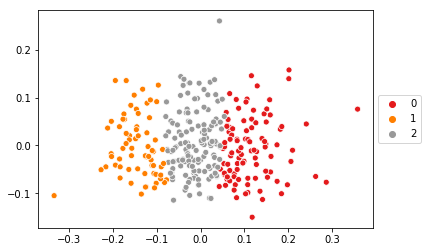

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      51  28
1      34  63
2      43  31
3      11  42
Accuracy of 4 model is: 0.657


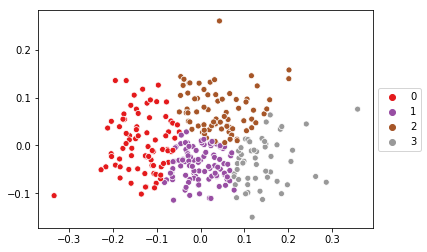

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      35  52
1      33   8
2      43  32
3      19  63
4       9   9
Accuracy of 5 model is: 0.660


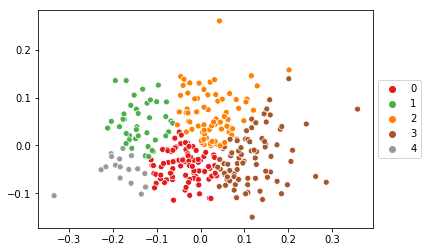

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      22   9
1      28  19
2      30  20
3      21  51
4      10  41
5      28  24
Accuracy of 6 model is: 0.660


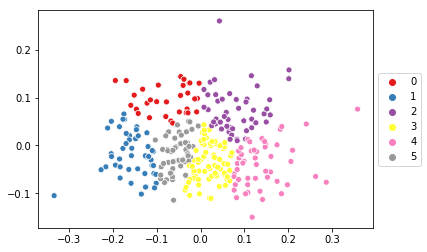

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      28  40
1      22   9
2      22  44
3      12  13
4      30  11
5       8  36
6      17  11
Accuracy of 7 model is: 0.667


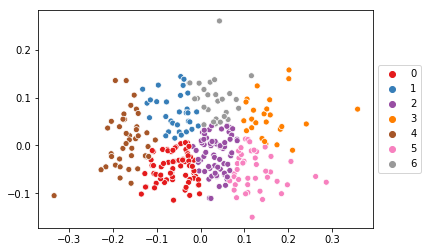

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0       3  17
1      22   9
2      10  38
3      19  23
4      27  11
5      33  39
6      19  13
7       6  14
Accuracy of 8 model is: 0.657


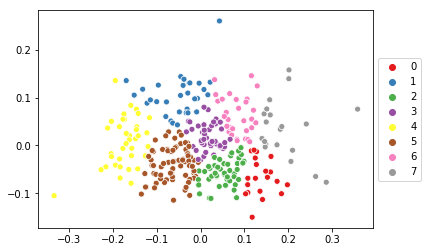

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      17  20
1       6  16
2      29  25
3      13   7
4      17  13
5      20   4
6       6  33
7      13  30
8      18  16
Accuracy of 9 model is: 0.647


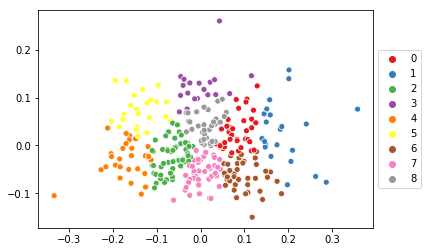

In [78]:
for n in range(3, 10):
    minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=n,
    batch_size=200)

    predict_mini = minibatchkmeans.fit_predict(X_pca)


    # Check the MiniBatch Model against the data
    print('Comparing k-means clusters against the data:')
    cross = pd.crosstab(predict_mini, y)
    print(cross)

    kmeans_acc(cross, n, y)
    
    
    # Plot the solution
    sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=predict_mini, palette='Set1', legend='full')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

I like the this dataset split into 6 clusters.  Three of the clusters would correspond to 0, and 3 to 1.  This helps to capture the diagnal nature of the data split. When I look at the percent correctly classified if I combine clusters together, 6 clusters seems like a good granularity.  

In [77]:
def kmeans_acc(cross, n, y):
    right = 0
    for x in range(n):
        if cross[0][x] < cross[1][x]:
            right += cross[1][x]
        else:
            right += cross[0][x]
    print('Accuracy of {} model is: {:.3f}'.format(n, right/len(y)))
    

303